<a href="https://colab.research.google.com/github/dicky-alfansyah/dicoding/blob/main/Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : M Dicky Alfansyah**

Kriteria submission yang harus dipenuhi :



1.   Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command:
```
https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
```
2.   Dataset harus dibagi menjadi train set dan validation set.
1.   Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
1.   Menggunakan image data generator.
2.   Model harus menggunakan model sequential.
2.   Program dikerjakan pada Google Colaboratory.
1.   Akurasi dari model minimal 85%.
2.   Dapat memprediksi gambar yang diunggah ke Colab seperti gambar di bawah.
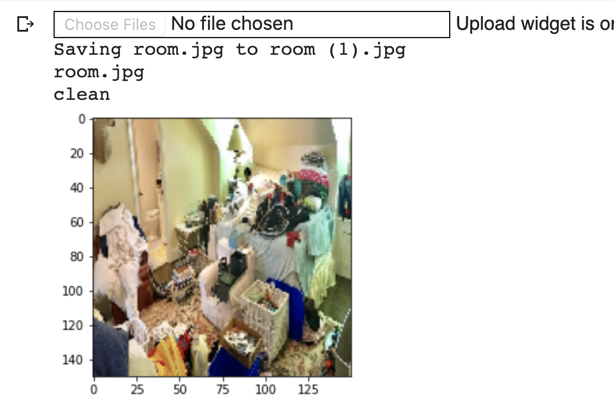
1.   Manambahkan data diri (sesuai profil Dicoding) pada submission/project yang dikirimkan.











In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.13.0


In [3]:
!wget -q --show-progress https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip


rockpaperscissors.z 100%[===================>] 307.92M   111MB/s    in 2.8s    


In [4]:
import zipfile
import os
import splitfolders

!unzip -q 'rockpaperscissors.zip' -d 'rps'

splitfolders.ratio('rps/rockpaperscissors/rps-cv-images', output="rps/rockpaperscissors/data", seed=1337, ratio=(.6, .4))

data_dir = 'rps/rockpaperscissors/data'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

os.listdir('rps/rockpaperscissors/data/train')
os.listdir('rps/rockpaperscissors/data/val')


Copying files: 2188 files [00:00, 3237.00 files/s]


['scissors', 'rock', 'paper']

In [5]:
train_paper_dir = "rps/rockpaperscissors/paper"
train_scissors_dir = "rps/rockpaperscissors/scissors"
train_rock_dir = "rps/rockpaperscissors/rock"

print(len(os.listdir(train_paper_dir)))
print(len(os.listdir(train_scissors_dir)))
print(len(os.listdir(train_rock_dir)))

712
750
726


In [6]:
paper_imgs = os.listdir(train_paper_dir)
scissors_imgs = os.listdir(train_scissors_dir)
rock_imgs = os.listdir(train_rock_dir)

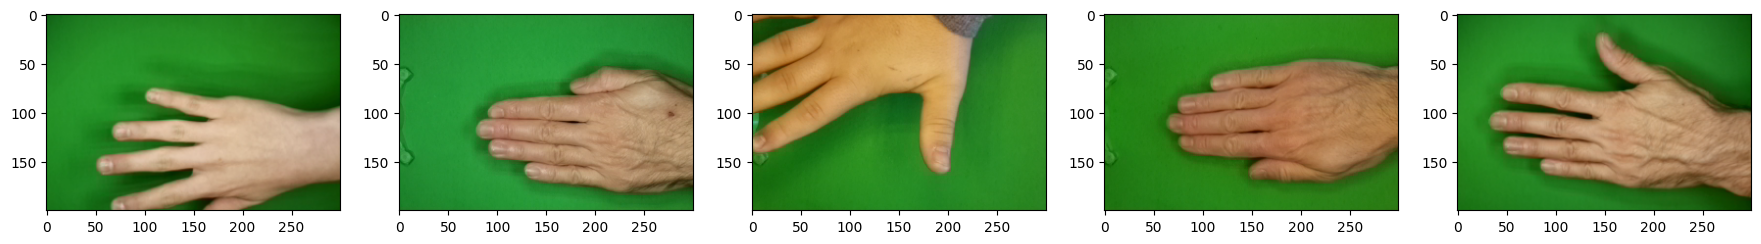

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(22, 5))
for i, img_path in enumerate(paper_imgs[:5]):
  sp = plt.subplot(1, 5, i+1)
  img = mpimg.imread(os.path.join(train_paper_dir, img_path))
  plt.imshow(img)
plt.show()


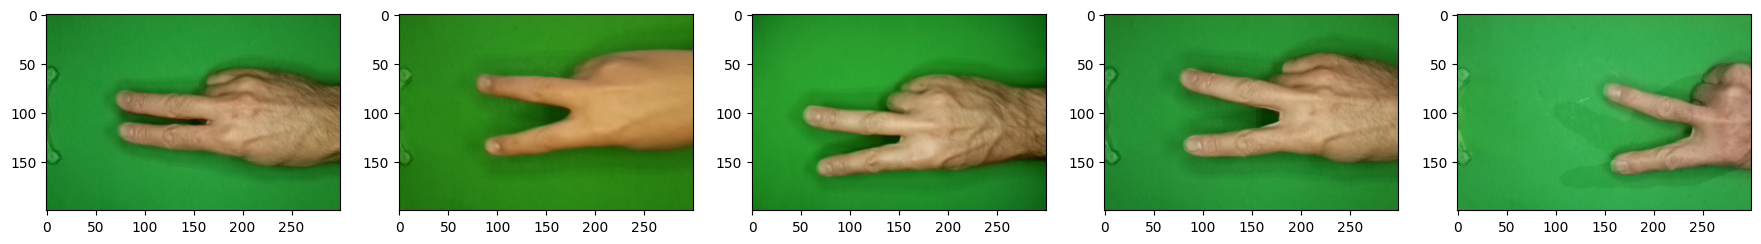

In [8]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(scissors_imgs[:5]):
  sp = plt.subplot(1, 5, i+1)
  img = mpimg.imread(os.path.join(train_scissors_dir, img_path))
  plt.imshow(img)
plt.show()

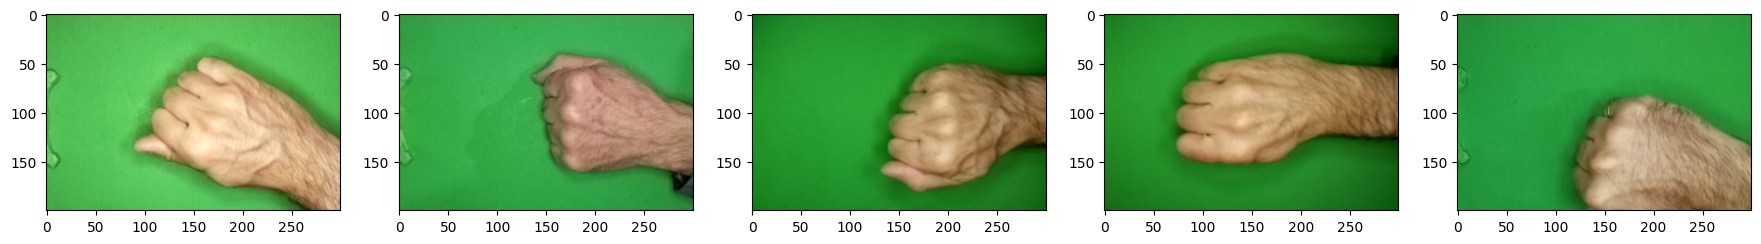

In [9]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(rock_imgs[:5]):
  sp = plt.subplot(1, 5, i+1)
  img = mpimg.imread(os.path.join(train_rock_dir, img_path))
  plt.imshow(img)
plt.show()

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.9999, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.9999)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True
)

valid_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [13]:
valid_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 49, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 32)        0

In [15]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= 'RMSprop',
              metrics= ['accuracy'])

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98:
            print("\nAkurasi pelatihan dan validasi di atas 98%, hentikan pelatihan.")
            self.model.stop_training = True

callbacks = myCallback()

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = valid_generator,
    validation_steps = 27,
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
41/41 - 25s - loss: 1.1002 - accuracy: 0.4215 - val_loss: 0.9924 - val_accuracy: 0.6782 - 25s/epoch - 603ms/step
Epoch 2/20
41/41 - 22s - loss: 0.6651 - accuracy: 0.7386 - val_loss: 0.5032 - val_accuracy: 0.9005 - 22s/epoch - 544ms/step
Epoch 3/20
41/41 - 22s - loss: 0.3944 - accuracy: 0.8498 - val_loss: 0.3938 - val_accuracy: 0.8854 - 22s/epoch - 542ms/step
Epoch 4/20
41/41 - 23s - loss: 0.2821 - accuracy: 0.9055 - val_loss: 0.2372 - val_accuracy: 0.9398 - 23s/epoch - 552ms/step
Epoch 5/20
41/41 - 23s - loss: 0.2391 - accuracy: 0.9200 - val_loss: 0.6809 - val_accuracy: 0.7141 - 23s/epoch - 552ms/step
Epoch 6/20
41/41 - 23s - loss: 0.1832 - accuracy: 0.9367 - val_loss: 0.1801 - val_accuracy: 0.9375 - 23s/epoch - 552ms/step
Epoch 7/20
41/41 - 22s - loss: 0.1814 - accuracy: 0.9375 - val_loss: 0.1467 - val_accuracy: 0.9664 - 22s/epoch - 549ms/step
Epoch 8/20
41/41 - 23s - loss: 0.1326 - accuracy: 0.9505 - val_loss: 0.1425 - val_accuracy: 0.9583 - 23s/epoch - 550ms/step
Epoch 9/

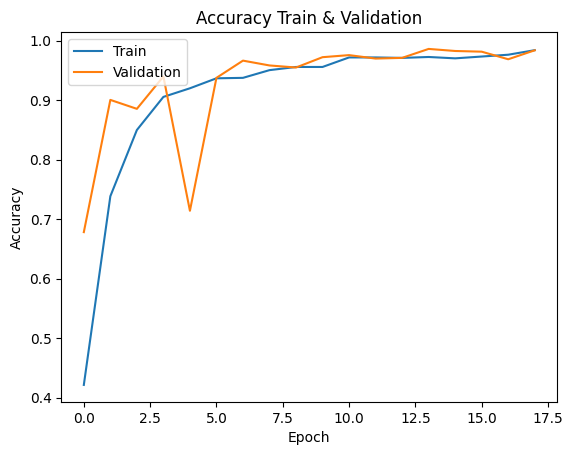

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Train & Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Masukkan URL gambar: https://i.ibb.co/F0wCq0F/2-TAGo-Xw7ya-K0b-XBu.png
1/1 [==============================] - 0s 159ms/step
Terdeteksi sebagai: Scissors


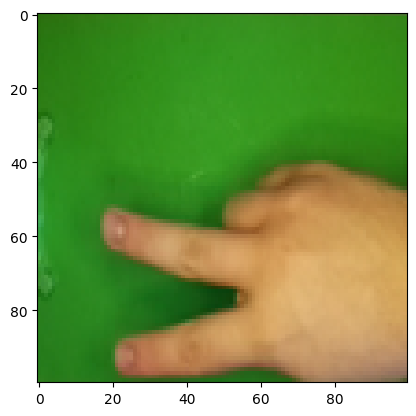

In [20]:
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

url = input("Masukkan URL gambar: ")
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.resize((100, 100))
plt.imshow(img)

x = np.array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)

if classes[0, 0] == 1.0:
    print('Terdeteksi sebagai: Paper')
elif classes[0, 1] == 1.0:
    print('Terdeteksi sebagai: Rock')
else:
    print('Terdeteksi sebagai: Scissors')
